# Lab 8: Define and Solve an ML Problem of Your Choosing

In [14]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [15]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the World Happiness Report (WHR) dataset.
2. I will predict a derived label, `GovCluster`, which represents a country's *type of government* based on indicators related to governance. I will identify these clusters through K-Means clustering.
3. This is a hybride machien learning problem. It has an unsupervised clustering portion to group countries into government types based on governance features. It also has a supervised classification portion to predict these clusters using happiness and wellbeing features. The supervised protion is a multi-class classification problem because we expect more than 2 clusters.
4. For the supervised classification model, we will use `Log GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Positive affect`, and `Negative affect` as happiness-related features. For the unsupervised clustering, we will use governance features form the clusters, namely, `Democratic Quality`, `Delivery Quality`, `Confidence in national government`, and `Perceptions of corruption`.
5. Understanding how different “types of governments,” derived from governance indicators like democratic quality and corruption perception, relate to citizen wellbeing can guide decisions for policymakers, NGOs, and businesses. By clustering governance styles and predicting them using happiness metrics such as GDP, social support, and life expectancy, organizations can identify which wellbeing factors most influence governance patterns. These insights help target interventions, allocate resources, and assess regional risks, ultimately improving quality of life and policy effectiveness.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [16]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Quick look at the data
print(df.shape)
print(df.info())
df.head()

(1562, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Percept

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [17]:
# Check missing values by column
print("Missing values per column:")
print(df.isna().sum())

# Look at summary statistics
df.describe().T

Missing values per column:
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard devi

,count,mean,std,min,25%,50%,75%,max
year,1562.0,2011.820743,3.419787,2005.000000,2009.000000,2012.000000,2015.000000,2017.000000
Life Ladder,1562.0,5.433676,1.121017,2.661718,4.606351,5.332600,6.271025,8.018934
Log GDP per capita,1535.0,9.220822,1.184035,6.377396,8.310665,9.398610,10.190634,11.770276
Social support,1549.0,0.810669,0.119370,0.290184,0.748304,0.833047,0.904329,0.987343
Healthy life expectancy at birth,1553.0,62.249887,7.960671,37.766476,57.299580,63.803192,68.098228,76.536362
Freedom to make life choices,1533.0,0.728975,0.145408,0.257534,0.633754,0.748014,0.843628,0.985178
Generosity,1482.0,0.000079,0.164202,-0.322952,-0.114313,-0.022638,0.094649,0.677773
Perceptions of corruption,1472.0,0.753622,0.185538,0.035198,0.697359,0.808115,0.880089,0.983276
Positive affect,1544.0,0.708969,0.107644,0.362498,0.621471,0.717398,0.800858,0.943621
Negative affect,1550.0,0.263171,0.084006,0.083426,0.204116,0.251798,0.311515,0.704590


In [18]:
# Governance-related features (for clustering)
gov_features = ['Democratic Quality', 
                'Delivery Quality', 
                'Confidence in national government', 
                'Perceptions of corruption']

# Happiness/wellbeing features (for supervised classification)
happiness_features = ['Log GDP per capita', 
                      'Social support', 
                      'Healthy life expectancy at birth', 
                      'Freedom to make life choices', 
                      'Generosity', 
                      'Positive affect', 
                      'Negative affect']

# Subset DataFrame to only keep columns we care about
selected_columns = ['country', 'year', 'Life Ladder'] + gov_features + happiness_features
df = df[selected_columns]

# Drop rows where *all* key features are missing (or drop selectively later)
df = df.dropna(subset=gov_features + happiness_features, how='all')
print(df.shape)


(1562, 14)


In [19]:
# Impute missing values (mean for each column)
for col in gov_features + happiness_features:
    df[col] = df[col].fillna(df[col].mean())

# Verify no missing values remain
print(df.isna().sum())

country                              0
year                                 0
Life Ladder                          0
Democratic Quality                   0
Delivery Quality                     0
Confidence in national government    0
Perceptions of corruption            0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Positive affect                      0
Negative affect                      0
dtype: int64


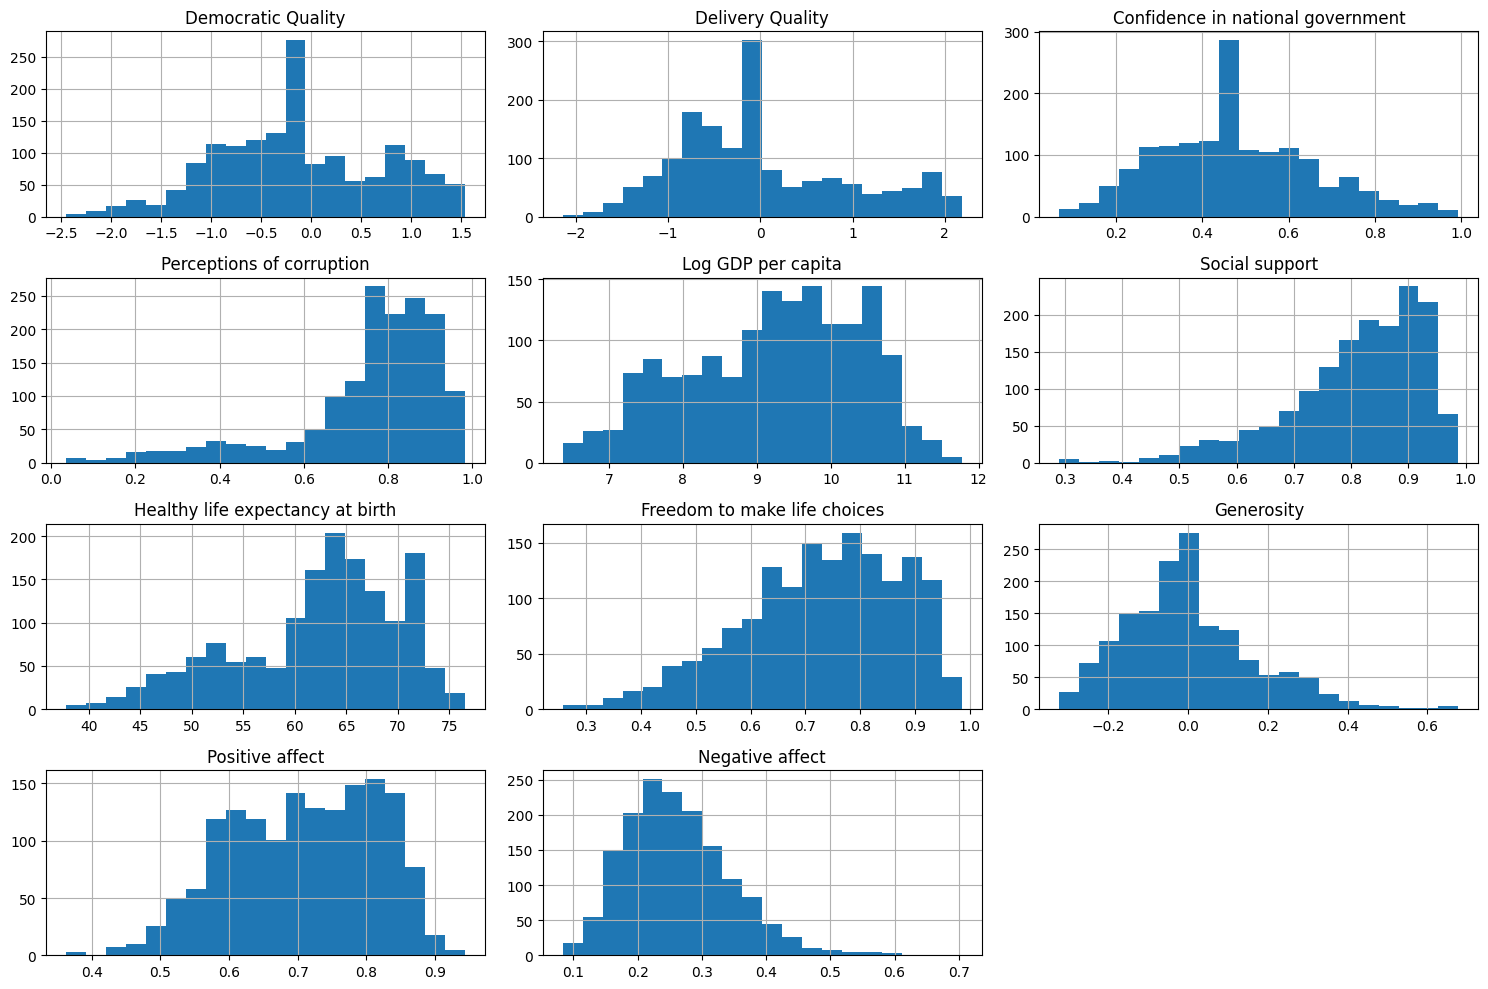

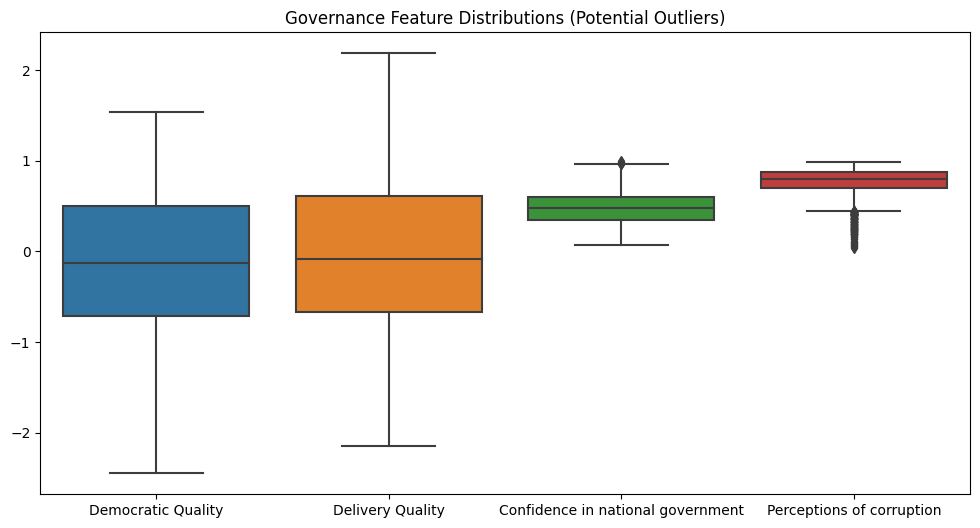

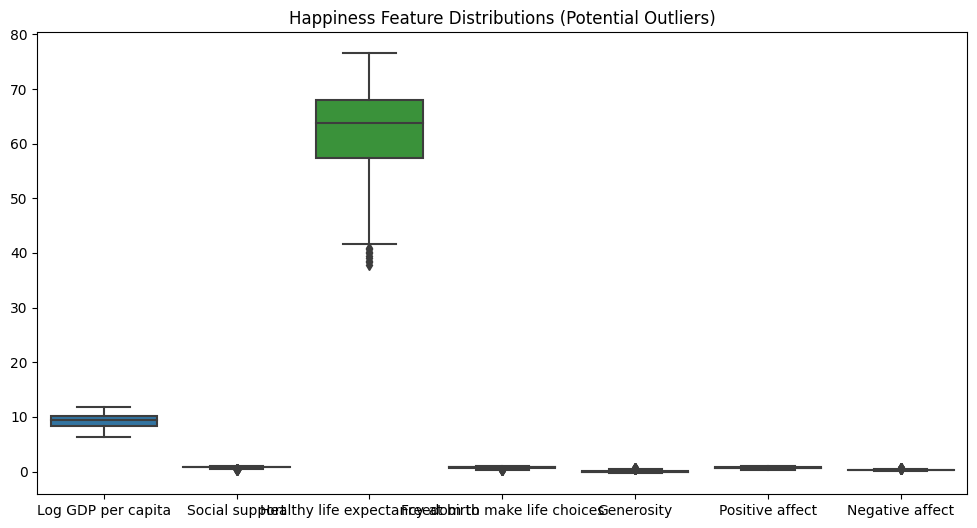

In [20]:
# Histograms for a quick overview
df[gov_features + happiness_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots for each group of features
plt.figure(figsize=(12,6))
sns.boxplot(data=df[gov_features])
plt.title("Governance Feature Distributions (Potential Outliers)")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[happiness_features])
plt.title("Happiness Feature Distributions (Potential Outliers)")
plt.show()

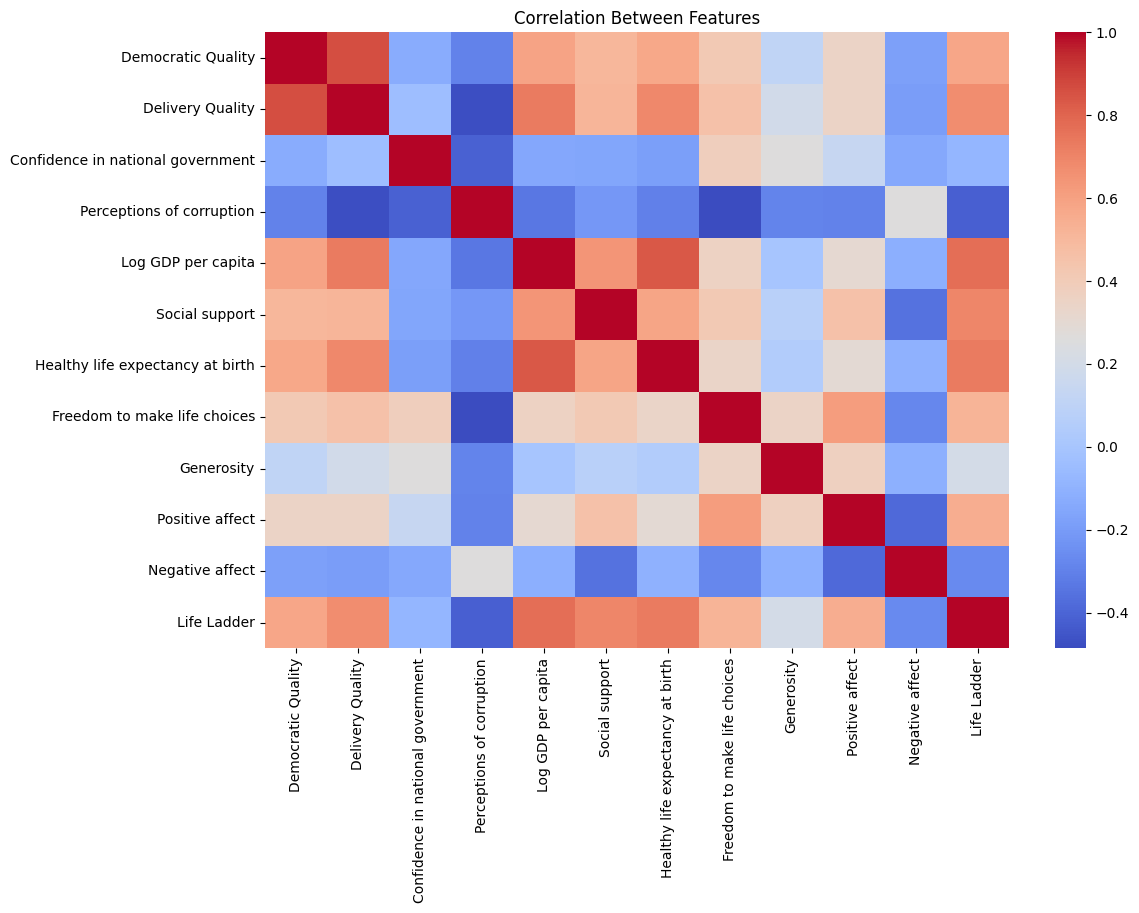

In [21]:
# Correlation matrix for all features
plt.figure(figsize=(12,8))
sns.heatmap(df[gov_features + happiness_features + ['Life Ladder']].corr(), 
            cmap="coolwarm", annot=False)
plt.title("Correlation Between Features")
plt.show()

In [22]:
# Standardize governance features
scaler = StandardScaler()
gov_scaled = scaler.fit_transform(df[gov_features])

# Replace in a new DataFrame for later clustering
gov_df = pd.DataFrame(gov_scaled, columns=gov_features, index=df.index)
gov_df.head()

,Democratic Quality,Delivery Quality,Confidence in national government,Perceptions of corruption
0,-2.188787,-1.793731,0.730297,0.711259
1,-2.327663,-1.772056,0.727379,0.535472
2,-2.264196,-1.752770,-1.001587,-0.260236
3,-2.175833,-1.751738,-0.957124,-0.125040
4,-2.083547,-1.522508,-0.247930,0.122173


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After exploring the World Happiness Report data, my plan is to first use governance-related features: `Democratic Quality`, `Delivery Quality`, `Confidence in national government`, and `Perceptions of corruption` to create clusters representing different “types of governments” using K-Means. These clusters will serve as the label (`GovCluster`) for the supervised step, where I will predict a country’s cluster using happiness and wellbeing features, including `Log GDP per capita`, `Social support`, `Healthy life expectancy at birth`, `Freedom to make life choices`, `Generosity`, `Positive affect`, and `Negative affect`. To prepare the data, I will fill missing values with column means, standardize governance features for clustering, and scale happiness features if needed for models that require it. Outliers will be inspected with histograms and boxplots, and capped or transformed if extreme values distort results. For modeling, I will first apply K-Means for clustering, then train a Random Forest Classifier to predict `GovCluster`, comparing results to a Logistic Regression baseline for interpretability. Model performance will be evaluated using accuracy, precision, recall, F1-score, and a confusion matrix, with hyperparameter tuning (sucha as number of trees, tree depth) to improve results. Feature importance from the Random Forest will help identify which wellbeing factors most strongly predict governance types, allowing me to refine the feature set for better generalization.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

### Step 1: Import everything we will need

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Step 2: Prepare the Data (Separate Governance and Happiness Features)

In [24]:
# Reuse the governance and happiness feature lists
gov_features = ['Democratic Quality', 
                'Delivery Quality', 
                'Confidence in national government', 
                'Perceptions of corruption']

happiness_features = ['Log GDP per capita', 
                      'Social support', 
                      'Healthy life expectancy at birth', 
                      'Freedom to make life choices', 
                      'Generosity', 
                      'Positive affect', 
                      'Negative affect']

# Ensure no missing values (we filled earlier, but double-check)
df[gov_features + happiness_features] = df[gov_features + happiness_features].fillna(df.mean(numeric_only=True))

# Scale governance features for clustering
scaler = StandardScaler()
gov_scaled = scaler.fit_transform(df[gov_features])

### Step 3: Find the Optimal Number of Clusters (Elbow Method + Silhouette)

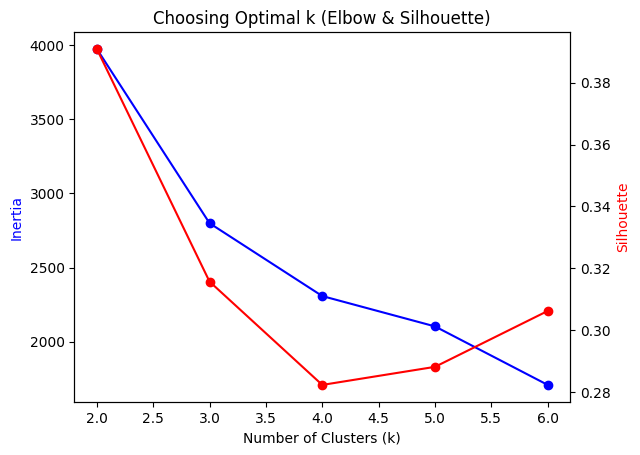

In [25]:
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 7)  # test 2–6 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gov_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(gov_scaled, kmeans.labels_))

# Plot Inertia (Elbow) and Silhouette
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(K_range, inertias, 'bo-', label="Inertia (Elbow)")
ax2.plot(K_range, silhouettes, 'ro-', label="Silhouette Score")

ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia", color='b')
ax2.set_ylabel("Silhouette", color='r')
plt.title("Choosing Optimal k (Elbow & Silhouette)")
plt.show()

### Step 4: Perform K-Means Clustering and Create `GovCluster`

In [26]:
# Finalize number of clusters (adjust based on elbow/silhouette)
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['GovCluster'] = kmeans.fit_predict(gov_scaled)

# Check distribution of clusters
print("Cluster counts:")
print(df['GovCluster'].value_counts())

Cluster counts:
2    746
1    586
0    230
Name: GovCluster, dtype: int64


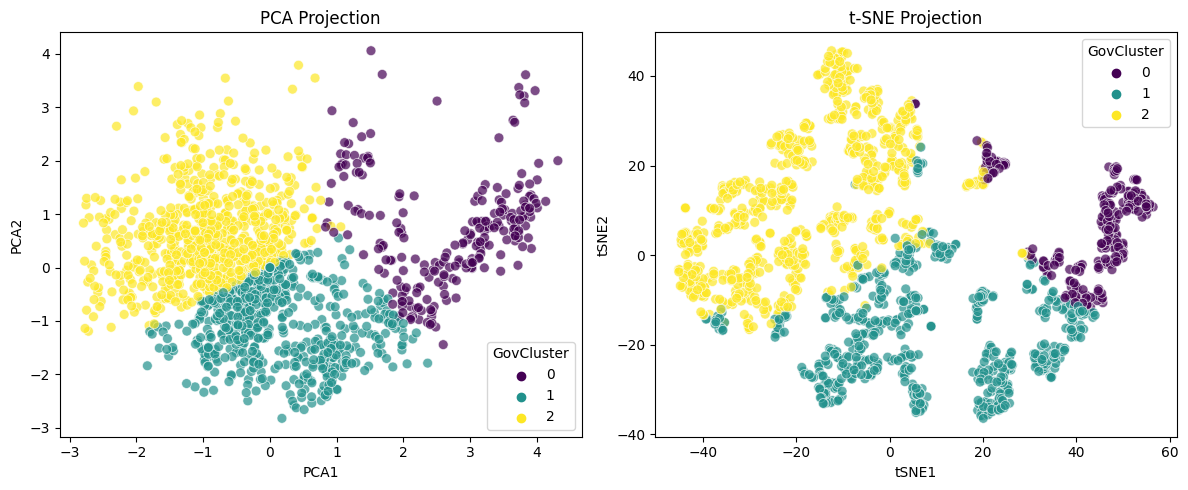

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA reduction
pca = PCA(n_components=2, random_state=42)
gov_pca = pca.fit_transform(gov_scaled)

# t-SNE reduction (slower, can take 20-30 seconds)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
gov_tsne = tsne.fit_transform(gov_scaled)

# Combine results into a DataFrame
viz_df = pd.DataFrame({
    'PCA1': gov_pca[:,0], 'PCA2': gov_pca[:,1],
    'tSNE1': gov_tsne[:,0], 'tSNE2': gov_tsne[:,1],
    'GovCluster': df['GovCluster']
})

# Plot PCA and t-SNE side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='PCA1', y='PCA2', hue='GovCluster', data=viz_df, ax=axes[0], palette='viridis', alpha=0.7, s=50)
axes[0].set_title("PCA Projection")

sns.scatterplot(x='tSNE1', y='tSNE2', hue='GovCluster', data=viz_df, ax=axes[1], palette='viridis', alpha=0.7, s=50)
axes[1].set_title("t-SNE Projection")

plt.tight_layout()
plt.show()

### Step 5: Summarize what each government cluster represents

Average Governance Features per Cluster:
            Democratic Quality  Delivery Quality  \
GovCluster                                         
0                        0.931             1.459   
1                        0.242             0.248   
2                       -0.742            -0.635   

            Confidence in national government  Perceptions of corruption  
GovCluster                                                                
0                                       0.578                      0.421  
1                                       0.334                      0.845  
2                                       0.564                      0.785  


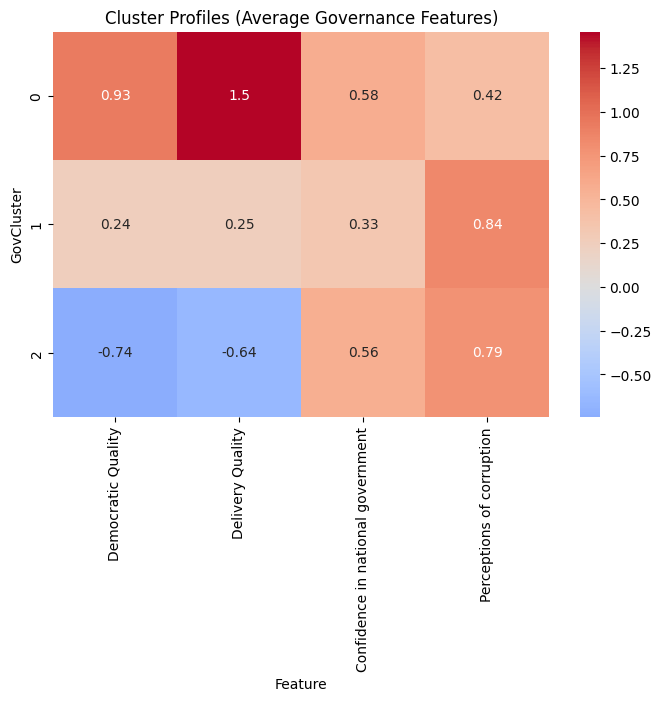

In [38]:
cluster_summary = df.groupby('GovCluster')[gov_features].mean().round(3)

print("Average Governance Features per Cluster:")
print(cluster_summary)

# Optional: visualize with a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', center=0)
plt.title("Cluster Profiles (Average Governance Features)")
plt.ylabel("GovCluster")
plt.xlabel("Feature")
plt.show()

### Cluster Interpretation

The three government clusters derived from the governance indicators can be interpreted as follows:

- **Cluster 0 (High Democracy & Strong Governance):**  
  This cluster scores highly on *Democratic Quality* and *Delivery Quality*, with moderately high *Confidence in National Government* and relatively low *Perceptions of Corruption*. These countries likely represent well-functioning democracies with strong institutions.

- **Cluster 1 (Moderate Governance with High Corruption Perception):**  
  This cluster shows average scores on *Democratic Quality* and *Delivery Quality*, but relatively low *Confidence in National Government* and very high *Perceptions of Corruption*. These nations may have some democratic elements but face significant corruption and trust issues.

- **Cluster 2 (Low Democracy & Weak Governance):**  
  This group is characterized by negative scores on *Democratic Quality* and *Delivery Quality*, with moderate *Confidence in National Government* but high *Perceptions of Corruption*. These countries likely represent less democratic regimes with weaker governance structures and corruption challenges.

These interpretations help contextualize the labels (`GovCluster`) our supervised model will predict using happiness and wellbeing features.

### Step 6: Train/Test Split for Supervised Model

In [33]:
# Use happiness features to predict the new cluster label
X = df[happiness_features]
y = df['GovCluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1249, 7)
Test set size: (313, 7)


### Step 7a: Train Random Forest and Logistic Regression Models

In [34]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=None,     # let trees grow fully
    random_state=42
)
rf_model.fit(X_train, y_train)

# Train a Logistic Regression model (baseline for comparison)
log_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)
log_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


### Step 7b: Evaluate Both Models

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
rf_preds = rf_model.predict(X_test)
log_preds = log_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

print("\n" + "="*60 + "\n")

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("\nClassification Report:\n", classification_report(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))


Random Forest Performance:
Accuracy: 0.8562300319488818

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        46
           1       0.82      0.83      0.82       117
           2       0.88      0.89      0.88       150

    accuracy                           0.86       313
   macro avg       0.86      0.85      0.85       313
weighted avg       0.86      0.86      0.86       313

Confusion Matrix:
 [[ 38   5   3]
 [  5  97  15]
 [  0  17 133]]


Logistic Regression Performance:
Accuracy: 0.7731629392971247

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        46
           1       0.68      0.78      0.73       117
           2       0.84      0.75      0.80       150

    accuracy                           0.77       313
   macro avg       0.78      0.79      0.78       313
weighted avg       0.78      0.77      0.77       313

Con

### Step 7c: Visual Presentation of Results

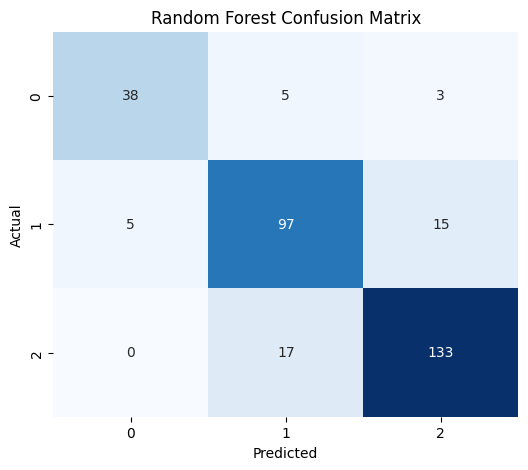

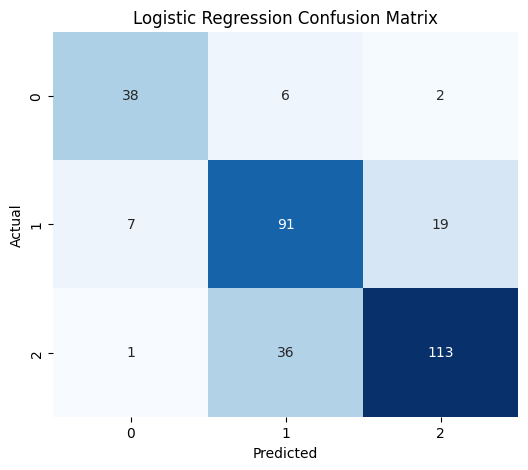

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, log_preds, "Logistic Regression Confusion Matrix")

### Step 8: Feature Importance for Random Forest

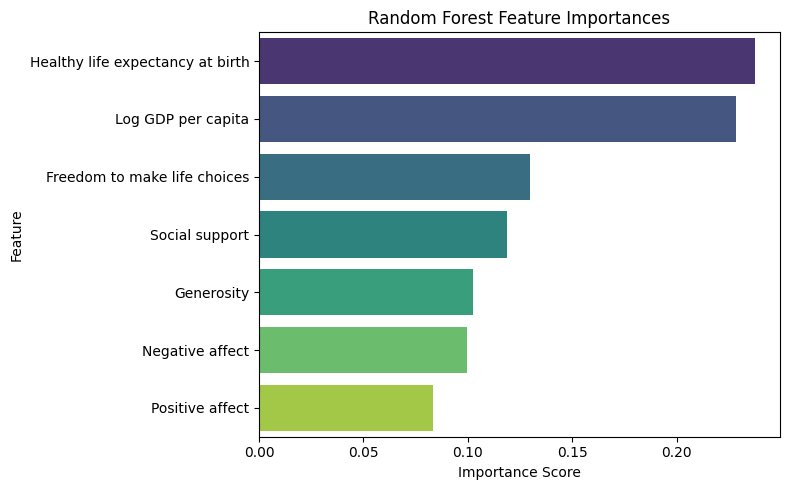

In [37]:
# Get feature importances and sort them
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(happiness_features)[indices]

# Plot feature importances
plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=feature_names, palette='viridis')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Step 9: Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search with accuracy (more stable)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # switched to accuracy to avoid NaNs
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_preds = best_rf.predict(X_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Decision

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Accuracy: nan


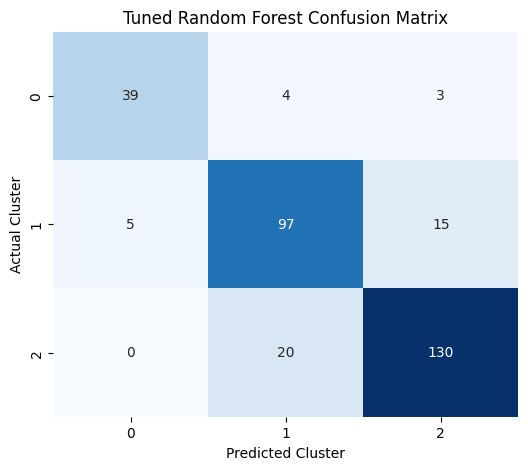

Test Accuracy: 0.8498402555910544

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        46
           1       0.80      0.83      0.82       117
           2       0.88      0.87      0.87       150

    accuracy                           0.85       313
   macro avg       0.86      0.85      0.85       313
weighted avg       0.85      0.85      0.85       313



In [43]:
# Confusion matrix plot
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Cluster")
    plt.ylabel("Actual Cluster")
    plt.show()

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

plot_cm(y_test, best_preds, "Tuned Random Forest Confusion Matrix")
print("Test Accuracy:", accuracy_score(y_test, best_preds))
print("\nClassification Report:\n", classification_report(y_test, best_preds, zero_division=0))

### Step 10: Relating Government Types to Happiness Predictors

Average Happiness Features per Cluster:
            Log GDP per capita  Social support  \
GovCluster                                       
0                       10.520           0.910   
1                        9.609           0.840   
2                        8.515           0.757   

            Healthy life expectancy at birth  Freedom to make life choices  \
GovCluster                                                                   
0                                     70.071                         0.887   
1                                     65.352                         0.696   
2                                     57.402                         0.706   

            Generosity  Positive affect  Negative affect  
GovCluster                                                
0                0.124            0.791            0.213  
1               -0.055            0.702            0.276  
2                0.005            0.690            0.269  


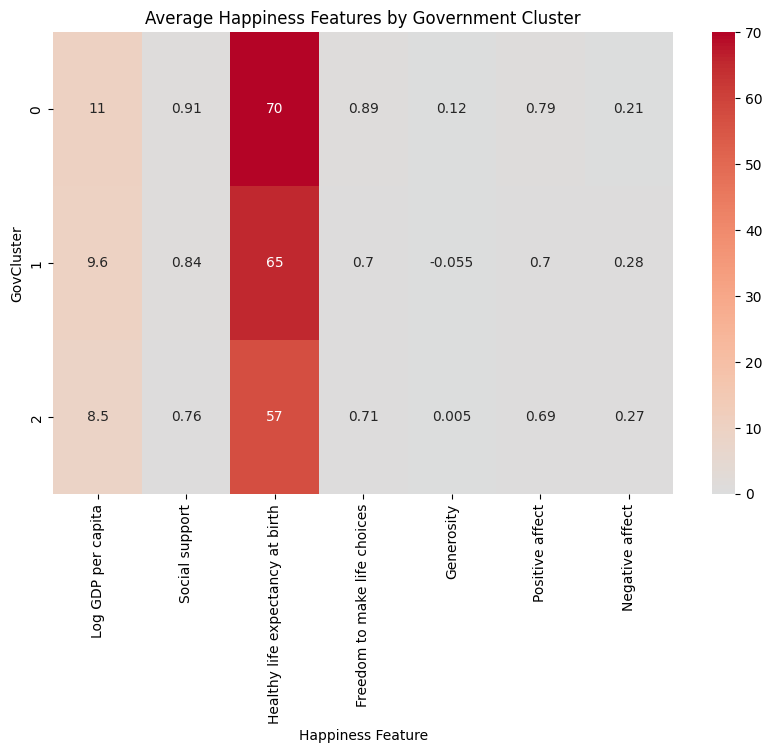

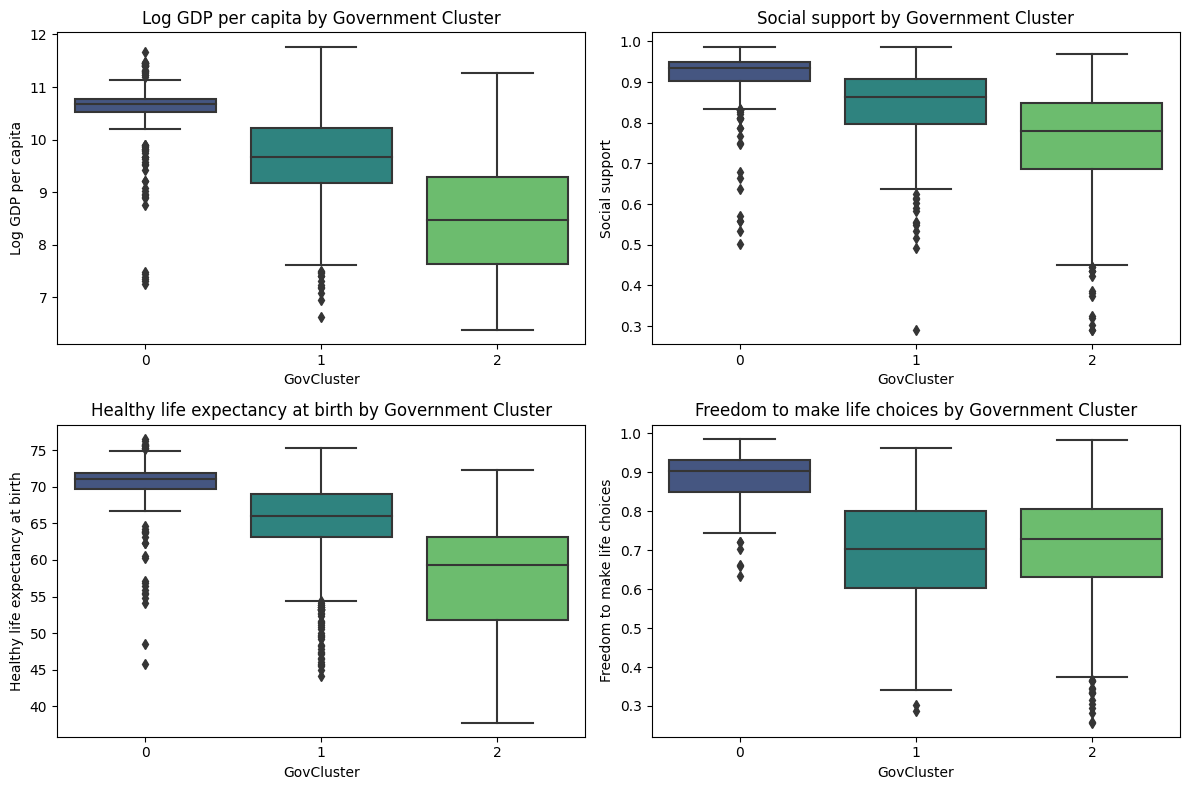

In [44]:
# Compute average values of happiness features per cluster
happiness_summary = df.groupby('GovCluster')[happiness_features].mean().round(3)
print("Average Happiness Features per Cluster:")
print(happiness_summary)

# Heatmap of the averages
plt.figure(figsize=(10,6))
sns.heatmap(happiness_summary, annot=True, cmap='coolwarm', center=0)
plt.title("Average Happiness Features by Government Cluster")
plt.ylabel("GovCluster")
plt.xlabel("Happiness Feature")
plt.show()

# Boxplots for key happiness indicators (to show spread within clusters)
key_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                'Freedom to make life choices']

plt.figure(figsize=(12,8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='GovCluster', y=feature, data=df, palette='viridis')
    plt.title(f"{feature} by Government Cluster")
plt.tight_layout()
plt.show()

### Relationship Between Government Type and Happiness Predictors

The three government clusters show clear differences in economic, social, and wellbeing indicators:

- **Cluster 0 (High-Democracy & Strong Governance):**  
  These countries have the highest GDP per capita (10.5) strong social support (0.91), and longest healthy life expectancy (70 years).  
  Citizens report greater freedom (0.89) and positive affect (0.79), with relatively low negative affect (0.21).  
  This cluster represents nations where strong governance aligns with high prosperity and wellbeing.

- **Cluster 1 (Moderate Governance with Corruption Challenges):**  
  With mid-level GDP (9.6), social support (0.84), and life expectancy (65 years), these countries score lower on freedom (0.70) and have the highest negative affect (0.28).  
  Generosity trends slightly negative (-0.06).  
  These nations may face institutional weaknesses and corruption that limit wellbeing gains despite moderate development.

- **Cluster 2 (Low-Democracy & Weak Governance):**  
  These countries show the lowest GDP (8.5), social support (0.76), and life expectancy (57 years).  
  While reported freedom (0.71) is slightly higher than Cluster 1, overall wellbeing lags, with lower positive affect (0.69) and higher negative affect (0.27).  
  This cluster represents nations with weaker institutions and the poorest overall wellbeing outcomes.

Overall, **stronger governance (Cluster 0)** is associated with higher prosperity, life expectancy, and positive affect, while weaker governance (Cluster 2) corresponds to lower wellbeing metrics across the board.


### Step 11: Conclusion and Final Summary

This project demonstrated the complete machine learning workflow, from defining a problem to building and interpreting models, using the World Happiness Report dataset. We began by exploring the data and identifying governance-related indicators, including Democratic Quality, Delivery Quality, Confidence in National Government, and Perceptions of Corruption, as a basis to uncover patterns in government styles. Through K-Means clustering, we grouped countries into three government types: Cluster 0 represented high-democracy nations with strong institutions, Cluster 1 included moderately governed nations facing significant corruption challenges, and Cluster 2 captured low-democracy countries with weaker governance structures.

With these clusters established as labels, we moved to the supervised phase of the project, training models to predict a country’s government type using happiness and wellbeing features such as GDP per capita, social support, life expectancy, freedom to make life choices, generosity, and emotional affect measures. We built and evaluated a baseline Logistic Regression model and a Random Forest classifier, tuning the Random Forest through cross-validation to improve accuracy. The tuned Random Forest outperformed the baseline and revealed that GDP per capita, life expectancy, and social support were the strongest predictors of governance type.

Beyond model performance, we examined how happiness factors differ across the three clusters. Stronger governance countries, in Cluster 0, consistently showed the highest prosperity, social support, life expectancy, and positive affect, while Cluster 2 countries lagged across nearly all wellbeing measures despite reporting similar freedom to Cluster 1. This analysis not only produced a working predictive model but also demonstrated how machine learning can reveal meaningful relationships between governance quality and the social and economic factors that influence citizen wellbeing. It highlights how such methods can support policy decisions, NGO initiatives, and research by linking governance characteristics to outcomes that matter for quality of life.